# **This file performs below operations** -

***s1: EVI and LSWI Modeling - timeframe (2000-2022)***
```
1. Draw Correlation Analysis plot
2. Plot some of the raw data variables
3. Draw histogram to check the skewness in the data
4. Draw Scatter plots.
5. Draw Jointplot and Regression plots as well.


```





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import walk
from time import sleep
from tqdm import tqdm
import pickle
import string
import numpy as np
import pandas as pd
from scipy import stats
from scipy import interpolate
import plotly.express as px
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gopi_base_path = '/content/drive/MyDrive/Colab Notebooks/DISC OU/DS for Ag - Alfalfa/Fall 2023'
Adam_base_path = '/content/drive/MyDrive/DSA Project'

raj_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
base_path = raj_path # just change this line
s1_data_path = os.path.join(base_path, 'Data','EVI and LSWI')
s2_data_path = os.path.join(base_path, 'Data','ER')

In [ ]:
main_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
data_path = os.path.join(main_path, 'Data')
code_path = os.path.join(main_path, 'Code')

In [ ]:
pickle_dir = os.path.join(data_path, 'pickle files')
# save the combined alfalfa data to a pickle file
pickle_dir = os.path.join(data_path, 'pickle files')
if os.path.exists(pickle_dir) == False:
  os.mkdir(pickle_dir)

In [ ]:
# Reading pickle file.
pickle_dir = os.path.join(data_path, 'pickle files')
file_name = 'p13_final_df_ind_imputed.pkl'
file_path = os.path.join(pickle_dir, file_name)
with open(file_path, 'rb') as fp:
    p13_final_df_ind_imputed = pickle.load(fp)

print(p13_final_df_ind_imputed.head())

             TMAX   TMIN   TAVG   HAVG  VDEF   HDEG  CDEG   WSPD   ATOT  RAIN  \
Date                                                                            
2000-03-16  51.91  30.63  35.60  99.84  0.01  23.73   0.0  12.53   1.95  0.23   
2000-03-17  44.02  31.91  38.90  99.32  0.06  27.03   0.0   4.99   3.44  0.40   
2000-03-18  47.59  39.43  42.18  91.32  0.85  21.49   0.0   8.90   5.66  0.02   
2000-03-19  60.55  37.21  46.12  67.95  4.29  16.12   0.0  11.10  23.28  0.00   
2000-03-20  73.85  37.63  55.00  57.60  8.43   9.26   0.0  15.37  23.64  0.00   

            ...   BAVG    TR05    TR25    TR60     EVI    LSWI  RAIN_7_Days  \
Date        ...                                                               
2000-03-16  ...  49.05  1.5728  1.5437  1.4708  0.1671 -0.2239         0.54   
2000-03-17  ...  43.58  1.5291  1.5439  1.4723  0.1700 -0.2250         0.93   
2000-03-18  ...  46.06  1.5287  1.5465  1.4685  0.1741 -0.2236         0.95   
2000-03-19  ...  48.53  1.5285  1.543

In [ ]:
p13_final_df_ind_imputed

TMAX   TMIN   TAVG   HAVG   VDEF   HDEG  CDEG   WSPD   ATOT  \
Date                                                                       
2000-03-16  51.91  30.63  35.60  99.84   0.01  23.73   0.0  12.53   1.95   
2000-03-17  44.02  31.91  38.90  99.32   0.06  27.03   0.0   4.99   3.44   
2000-03-18  47.59  39.43  42.18  91.32   0.85  21.49   0.0   8.90   5.66   
2000-03-19  60.55  37.21  46.12  67.95   4.29  16.12   0.0  11.10  23.28   
2000-03-20  73.85  37.63  55.00  57.60   8.43   9.26   0.0  15.37  23.64   
...           ...    ...    ...    ...    ...    ...   ...    ...    ...   
2021-12-23  62.96  35.38  48.06  75.90   3.46  15.83   0.0  11.00   9.35   
2021-12-24  78.84  50.56  65.62  38.61  14.70   0.30   0.0  18.00   7.44   
2021-12-25  71.31  45.97  58.67  48.67   9.56   6.36   0.0   7.34   9.60   
2021-12-26  76.24  38.72  59.83  61.17   8.73   7.52   0.0  12.92   6.94   
2021-12-27  58.95  38.09  50.24  34.21   8.45  16.48   0.0   9.20   8.15   

            RAIN  ...   BAVG    TR05    TR25    TR60     EVI    LSWI  \
Date              ...                                                  
2000-03-16  0.23  ...  49.05  1.5728  1.5437  1.4708  0.1671 -0.2239   
2000-03-17  0.40  ...  43.58  1.5291  1.5439  1.4723  0.1700 -0.2250   
2000-03-18  0.02  ...  46.06  1.5287  1.5465  1.4685  0.1741 -0.2236   
2000-03-19  0.00  ...  48.53  1.5285  1.5431  1.4681  0.1782 -0.2200   
2000-03-20  0.00  ...  50.28  1.5416  1.5443  1.4706  0.1825 -0.2141   
...          ...  ...    ...     ...     ...     ...     ...     ...   
2021-12-23  0.01  ...  47.67  2.3404  1.9822  2.5208  0.2145 -0.0925   
2021-12-24  0.00  ...  51.71  2.3299  1.9822  2.5161  0.2287 -0.0706   
2021-12-25  0.00  ...  55.04  2.3254  1.9832  2.5116  0.2484 -0.0417   
2021-12-26  0.00  ...  53.17  2.3360  1.9868  2.5046  0.2735 -0.0059   
2021-12-27  0.00  ...  52.70  2.3459  1.9922  2.4992  0.3040  0.0370   

            RAIN_7_Days  RAIN_14_Days  RAIN_21_Days  RAIN_28_Days  
Date                                                               
2000-03-16         0.54          1.31          2.60          3.08  
2000-03-17         0.93          1.64          2.42          3.48  
2000-03-18         0.95          1.66          2.44          3.50  
2000-03-19         0.95          1.66          2.44          3.50  
2000-03-20         0.95          1.66          2.44          3.50  
...                 ...           ...           ...           ...  
2021-12-23         0.01          0.02          0.02          0.02  
2021-12-24         0.01          0.01          0.02          0.02  
2021-12-25         0.01          0.01          0.02          0.02  
2021-12-26         0.01          0.01          0.02          0.02  
2021-12-27         0.01          0.01          0.02          0.02  

[7957 rows x 21 columns]

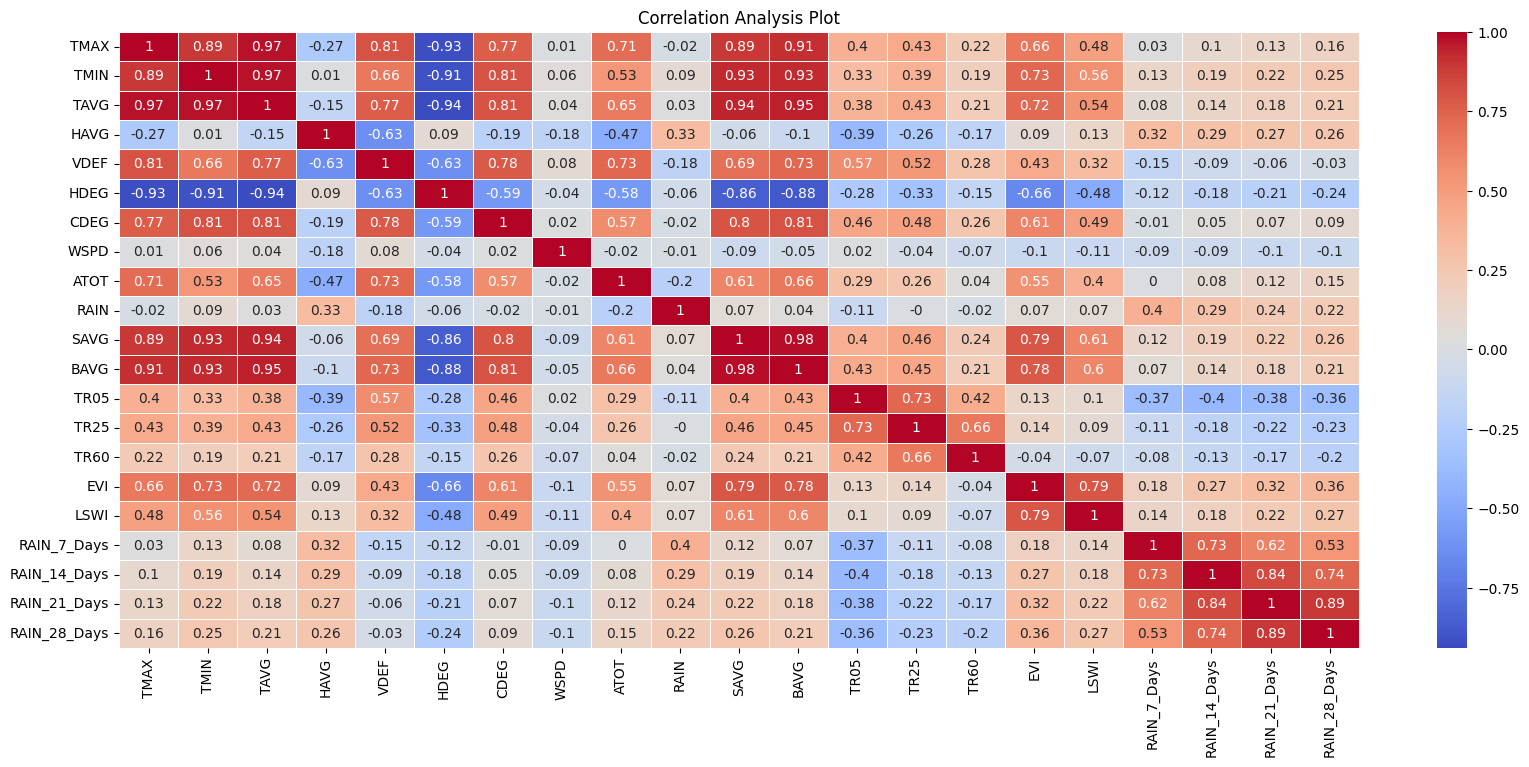

In [ ]:
# Correlation Analysis:
corr_matrix = p13_final_df_ind_imputed.corr().round(2)
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis Plot')
plt.show()

In [ ]:
p13_final_df_ind_imputed_1 = p13_final_df_ind_imputed.copy()

**Normalize the data for the visualization Purposes**

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on your data and transform it
normalized_p13_final_df_ind_imputed_1 = scaler.fit_transform(p13_final_df_ind_imputed_1)

# Convert the result back to a DataFrame
normalized_df = pd.DataFrame(normalized_p13_final_df_ind_imputed_1, columns=p13_final_df_ind_imputed_1.columns)

In [ ]:
normalized_df = normalized_df.set_index(p13_final_df_ind_imputed.index)

In [ ]:
normalized_df

TMAX      TMIN      TAVG      HAVG      VDEF      HDEG  CDEG  \
Date                                                                           
2000-03-16  0.365359  0.398265  0.310741  0.997794  0.000381  0.483595   0.0   
2000-03-17  0.284111  0.413071  0.347895  0.990625  0.002286  0.550846   0.0   
2000-03-18  0.320873  0.500058  0.384823  0.880325  0.032381  0.437946   0.0   
2000-03-19  0.454330  0.474378  0.429183  0.558114  0.163429  0.328510   0.0   
2000-03-20  0.591288  0.479237  0.529160  0.415414  0.321143  0.188710   0.0   
...              ...       ...       ...       ...       ...       ...   ...   
2021-12-23  0.479147  0.453210  0.451025  0.667724  0.131810  0.322600   0.0   
2021-12-24  0.642673  0.628803  0.648728  0.153592  0.560000  0.006114   0.0   
2021-12-25  0.565132  0.575709  0.570480  0.292293  0.364190  0.129611   0.0   
2021-12-26  0.615899  0.491845  0.583540  0.464635  0.332571  0.153250   0.0   
2021-12-27  0.437854  0.484558  0.475569  0.092927  0.321905  0.335847   0.0   

                WSPD      ATOT      RAIN  ...      BAVG      TR05      TR25  \
Date                                      ...                                 
2000-03-16  0.484720  0.046929  0.216981  ...  0.333232  0.091665  0.083714   
2000-03-17  0.130230  0.093858  0.377358  ...  0.250416  0.075140  0.083791   
2000-03-18  0.314057  0.163780  0.018868  ...  0.287964  0.074989  0.084791   
2000-03-19  0.417489  0.718740  0.000000  ...  0.325360  0.074913  0.083484   
2000-03-20  0.618242  0.730079  0.000000  ...  0.351855  0.079867  0.083945   
...              ...       ...       ...  ...       ...       ...       ...   
2021-12-23  0.412788  0.280000  0.009434  ...  0.312339  0.381939  0.252258   
2021-12-24  0.741890  0.219843  0.000000  ...  0.373505  0.377969  0.252258   
2021-12-25  0.240715  0.287874  0.000000  ...  0.423921  0.376267  0.252643   
2021-12-26  0.503056  0.204094  0.000000  ...  0.395609  0.380275  0.254026   
2021-12-27  0.328162  0.242205  0.000000  ...  0.388494  0.384019  0.256102   

                TR60       EVI      LSWI  RAIN_7_Days  RAIN_14_Days  \
Date                                                                  
2000-03-16  0.065424  0.335284  0.482975     0.163142      0.248577   
2000-03-17  0.066034  0.339141  0.482512     0.280967      0.311195   
2000-03-18  0.064487  0.344594  0.483102     0.287009      0.314991   
2000-03-19  0.064324  0.350047  0.484619     0.287009      0.314991   
2000-03-20  0.065342  0.355765  0.487105     0.287009      0.314991   
...              ...       ...       ...          ...           ...   
2021-12-23  0.492896  0.398324  0.538348     0.003021      0.003795   
2021-12-24  0.490982  0.417210  0.547577     0.003021      0.001898   
2021-12-25  0.489150  0.443410  0.559756     0.003021      0.001898   
2021-12-26  0.486301  0.476792  0.574842     0.003021      0.001898   
2021-12-27  0.484102  0.517356  0.592920     0.003021      0.001898   

            RAIN_21_Days  RAIN_28_Days  
Date                                    
2000-03-16      0.390977      0.427184  
2000-03-17      0.363910      0.482663  
2000-03-18      0.366917      0.485437  
2000-03-19      0.366917      0.485437  
2000-03-20      0.366917      0.485437  
...                  ...           ...  
2021-12-23      0.003008      0.002774  
2021-12-24      0.003008      0.002774  
2021-12-25      0.003008      0.002774  
2021-12-26      0.003008      0.002774  
2021-12-27      0.003008      0.002774  

[7957 rows x 21 columns]

In [ ]:
# Create the line chart
fig = px.line(normalized_df, x=normalized_df.index, y=['LSWI'])

# Update the layout to set the background colors
fig.update_layout(
    title={
        'text': "EVI and LSWI over time",
        'x':0.5
    },
    plot_bgcolor='black',  # Set the background color of the plot area
    paper_bgcolor='lightgray'  # Set the background color of the entire plot
)

# Display the chart
fig.show()

In [ ]:
normalized_df.columns

Index(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD', 'ATOT',
       'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60', 'EVI', 'LSWI',
       'RAIN_7_Days', 'RAIN_14_Days', 'RAIN_21_Days', 'RAIN_28_Days'],
      dtype='object')

In [ ]:
# Create the line chart
fig = px.line(normalized_df, x=normalized_df.index, y=['RAIN_28_Days','EVI','LSWI'])

# Update the layout to set the background colors
fig.update_layout(
    title={
        'text': "Effect of Rain on both EVI and LSWI",
        'x':0.5
    },
    plot_bgcolor='black',  # Set the background color of the plot area
    paper_bgcolor='lightgray'  # Set the background color of the entire plot
)

# Display the chart
fig.show()


In [ ]:
p13_final_df_ind_imputed_3 = p13_final_df_ind_imputed.copy()

In [ ]:
p13_final_df_ind_imputed_3.drop(['EVI','LSWI'],axis =1)

TMAX   TMIN   TAVG   HAVG   VDEF   HDEG  CDEG   WSPD   ATOT  \
Date                                                                       
2000-03-16  51.91  30.63  35.60  99.84   0.01  23.73   0.0  12.53   1.95   
2000-03-17  44.02  31.91  38.90  99.32   0.06  27.03   0.0   4.99   3.44   
2000-03-18  47.59  39.43  42.18  91.32   0.85  21.49   0.0   8.90   5.66   
2000-03-19  60.55  37.21  46.12  67.95   4.29  16.12   0.0  11.10  23.28   
2000-03-20  73.85  37.63  55.00  57.60   8.43   9.26   0.0  15.37  23.64   
...           ...    ...    ...    ...    ...    ...   ...    ...    ...   
2021-12-23  62.96  35.38  48.06  75.90   3.46  15.83   0.0  11.00   9.35   
2021-12-24  78.84  50.56  65.62  38.61  14.70   0.30   0.0  18.00   7.44   
2021-12-25  71.31  45.97  58.67  48.67   9.56   6.36   0.0   7.34   9.60   
2021-12-26  76.24  38.72  59.83  61.17   8.73   7.52   0.0  12.92   6.94   
2021-12-27  58.95  38.09  50.24  34.21   8.45  16.48   0.0   9.20   8.15   

            RAIN   SAVG   BAVG    TR05    TR25    TR60  RAIN_7_Days  \
Date                                                                  
2000-03-16  0.23  49.93  49.05  1.5728  1.5437  1.4708         0.54   
2000-03-17  0.40  45.32  43.58  1.5291  1.5439  1.4723         0.93   
2000-03-18  0.02  47.26  46.06  1.5287  1.5465  1.4685         0.95   
2000-03-19  0.00  48.96  48.53  1.5285  1.5431  1.4681         0.95   
2000-03-20  0.00  50.32  50.28  1.5416  1.5443  1.4706         0.95   
...          ...    ...    ...     ...     ...     ...          ...   
2021-12-23  0.01  48.02  47.67  2.3404  1.9822  2.5208         0.01   
2021-12-24  0.00  49.79  51.71  2.3299  1.9822  2.5161         0.01   
2021-12-25  0.00  51.51  55.04  2.3254  1.9832  2.5116         0.01   
2021-12-26  0.00  51.31  53.17  2.3360  1.9868  2.5046         0.01   
2021-12-27  0.00  51.03  52.70  2.3459  1.9922  2.4992         0.01   

            RAIN_14_Days  RAIN_21_Days  RAIN_28_Days  
Date                                                  
2000-03-16          1.31          2.60          3.08  
2000-03-17          1.64          2.42          3.48  
2000-03-18          1.66          2.44          3.50  
2000-03-19          1.66          2.44          3.50  
2000-03-20          1.66          2.44          3.50  
...                  ...           ...           ...  
2021-12-23          0.02          0.02          0.02  
2021-12-24          0.01          0.02          0.02  
2021-12-25          0.01          0.02          0.02  
2021-12-26          0.01          0.02          0.02  
2021-12-27          0.01          0.02          0.02  

[7957 rows x 19 columns]

In [ ]:
p13_final_df_ind_imputed= p13_final_df_ind_imputed.drop(['EVI','LSWI'],axis=1)

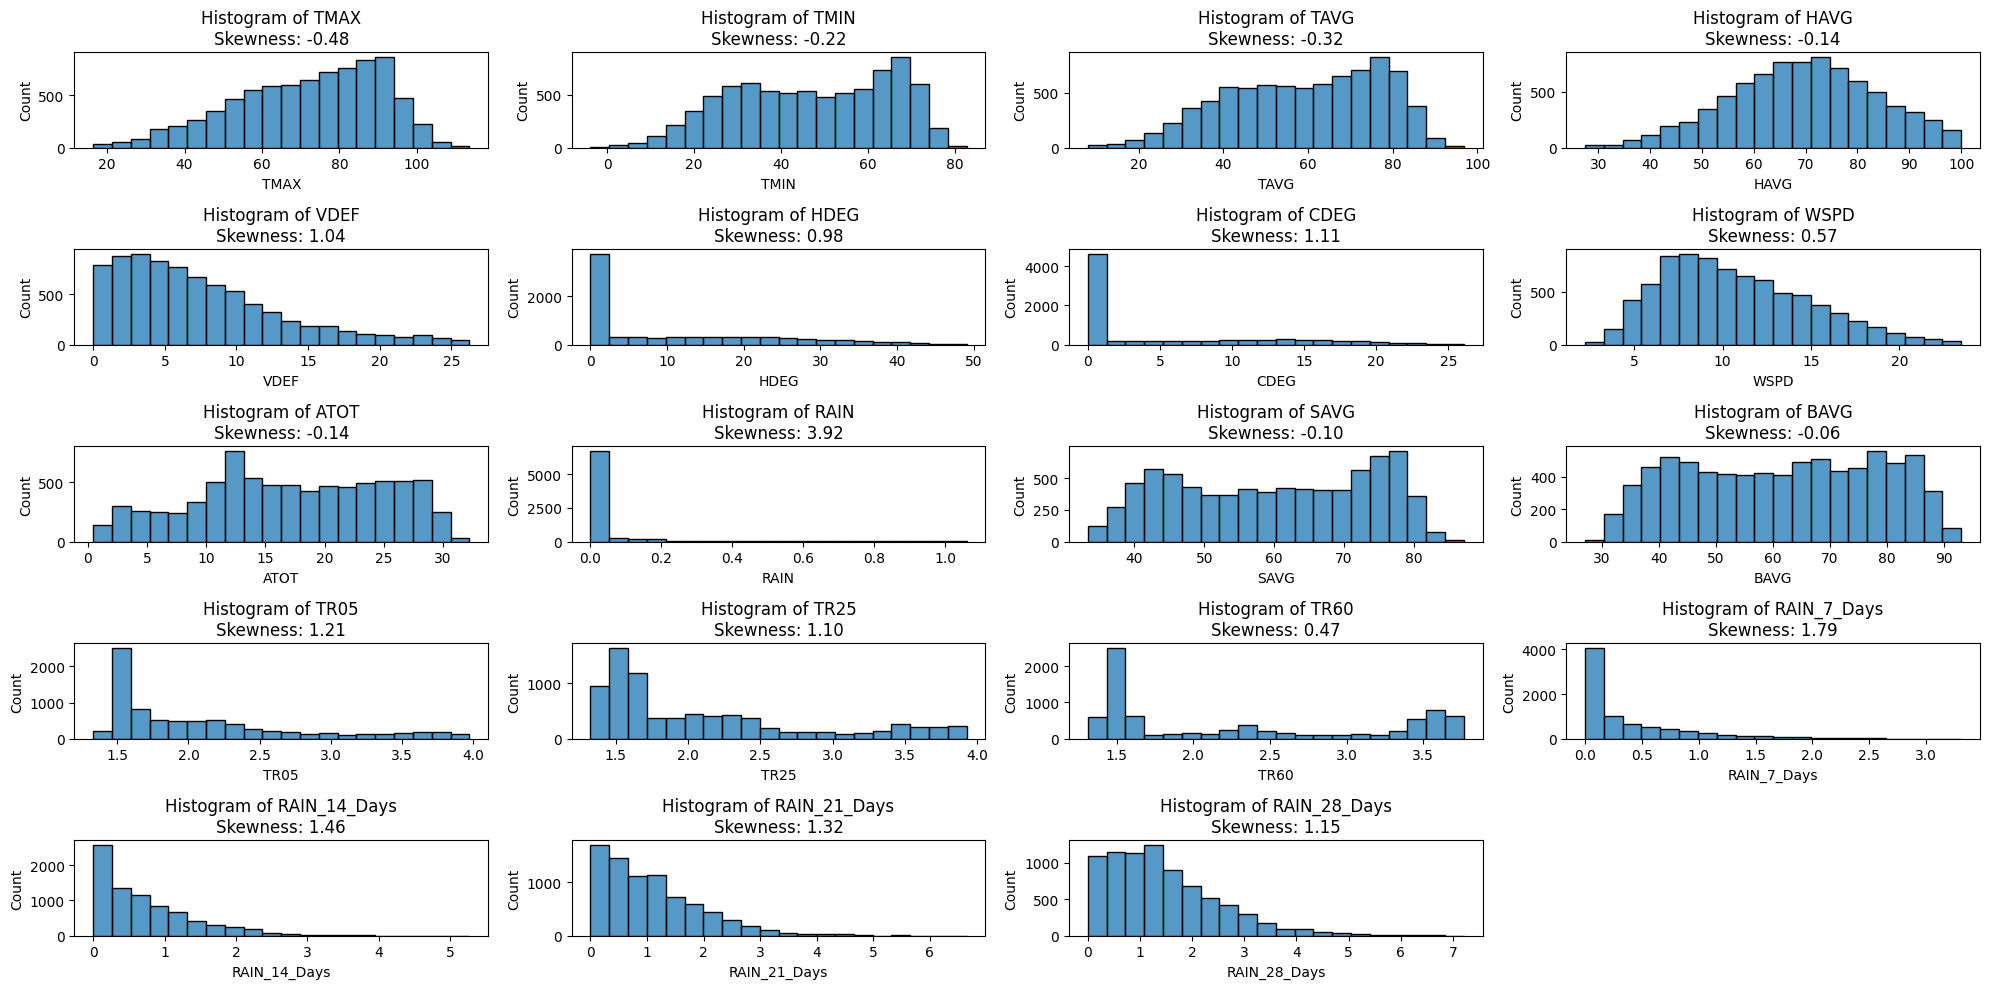

In [ ]:
import seaborn as sns

# Get the list of columns from your DataFrame
columns = p13_final_df_ind_imputed.columns

# Calculate the number of rows for the subplots
num_rows = 5  # Set the number of rows you want

# Calculate the number of columns required to accommodate all the subplots
num_cols = (len(columns) + num_rows - 1) // num_rows  # Use ceiling division

# Set up subplots to display histograms for each column with a smaller figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))  # Adjust the figsize to make it smaller

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=p13_final_df_ind_imputed_3, x=column, ax=ax, bins=20)  # You can adjust the number of bins as needed
    skewness = p13_final_df_ind_imputed_3[column].skew()  # Calculate skewness
    ax.set_title(f'Histogram of {column}\nSkewness: {skewness:.2f}')

# Remove any empty subplots
for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Create the line chart
fig = px.line(filtered_df, x=filtered_df.index, y=['RAIN_28_Days','EVI','LSWI'])

# Update the layout to set the background colors
fig.update_layout(
    title={
        'text': "Effect of Rain on both EVI and LSWI",
        'x':0.5
    },
    plot_bgcolor='black',  # Set the background color of the plot area
    paper_bgcolor='lightgray'  # Set the background color of the entire plot
)

# Display the chart
fig.show()

In [ ]:
contains_zeros = (filtered_df['LSWI'] == 0).any()

if contains_zeros:
    print("The column contains at least one zero value.")
else:
    print("The column does not contain any zero values.")

The column contains at least one zero value.


In [ ]:
# Specify the column to check for zero values
column_to_check = 'LSWI'

# Create a boolean mask to filter rows where the column contains zero values
contains_zeros = (filtered_df[column_to_check] == 0)

# Use the boolean mask to filter and print the corresponding rows
zero_rows = filtered_df[contains_zeros]
print(f"Rows where '{column_to_check}' contains zero values:")
print(zero_rows)

df_filtered = filtered_df[~contains_zeros]

Rows where 'LSWI' contains zero values:
              TMAX   TMIN   TAVG   HAVG   VDEF   HDEG   CDEG  WSPD   ATOT  \
Date                                                                        
2006-07-20  104.31  72.88  89.68  40.09  20.09   0.00  23.59  7.73  27.55   
2013-11-25   33.90  26.09  30.20  90.10   0.57  35.01   0.00  5.48   3.99   

            RAIN  ...       BAVG    TR05    TR25    TR60    EVI  LSWI  \
Date              ...                                                   
2006-07-20  0.00  ...  67.612346  3.6100  3.6329  3.6068  0.347   0.0   
2013-11-25  0.05  ...  37.580000  1.5824  1.7056  1.5629  0.244   0.0   

            RAIN_7_Days  RAIN_14_Days  RAIN_21_Days  RAIN_28_Days  
Date                                                               
2006-07-20         0.00          0.63           1.2          1.39  
2013-11-25         0.14          0.16           0.5          0.72  

[2 rows x 21 columns]


In [ ]:
df_filtered

TMAX   TMIN   TAVG   HAVG   VDEF   HDEG  CDEG   WSPD   ATOT  \
Date                                                                       
2000-03-16  51.91  30.63  35.60  99.84   0.01  23.73   0.0  12.53   1.95   
2000-03-17  44.02  31.91  38.90  99.32   0.06  27.03   0.0   4.99   3.44   
2000-03-18  47.59  39.43  42.18  91.32   0.85  21.49   0.0   8.90   5.66   
2000-03-19  60.55  37.21  46.12  67.95   4.29  16.12   0.0  11.10  23.28   
2000-03-20  73.85  37.63  55.00  57.60   8.43   9.26   0.0  15.37  23.64   
...           ...    ...    ...    ...    ...    ...   ...    ...    ...   
2021-12-23  62.96  35.38  48.06  75.90   3.46  15.83   0.0  11.00   9.35   
2021-12-24  78.84  50.56  65.62  38.61  14.70   0.30   0.0  18.00   7.44   
2021-12-25  71.31  45.97  58.67  48.67   9.56   6.36   0.0   7.34   9.60   
2021-12-26  76.24  38.72  59.83  61.17   8.73   7.52   0.0  12.92   6.94   
2021-12-27  58.95  38.09  50.24  34.21   8.45  16.48   0.0   9.20   8.15   

            RAIN  ...   BAVG    TR05    TR25    TR60     EVI    LSWI  \
Date              ...                                                  
2000-03-16  0.23  ...  49.05  1.5728  1.5437  1.4708  0.1671 -0.2239   
2000-03-17  0.40  ...  43.58  1.5291  1.5439  1.4723  0.1700 -0.2250   
2000-03-18  0.02  ...  46.06  1.5287  1.5465  1.4685  0.1741 -0.2236   
2000-03-19  0.00  ...  48.53  1.5285  1.5431  1.4681  0.1782 -0.2200   
2000-03-20  0.00  ...  50.28  1.5416  1.5443  1.4706  0.1825 -0.2141   
...          ...  ...    ...     ...     ...     ...     ...     ...   
2021-12-23  0.01  ...  47.67  2.3404  1.9822  2.5208  0.2145 -0.0925   
2021-12-24  0.00  ...  51.71  2.3299  1.9822  2.5161  0.2287 -0.0706   
2021-12-25  0.00  ...  55.04  2.3254  1.9832  2.5116  0.2484 -0.0417   
2021-12-26  0.00  ...  53.17  2.3360  1.9868  2.5046  0.2735 -0.0059   
2021-12-27  0.00  ...  52.70  2.3459  1.9922  2.4992  0.3040  0.0370   

            RAIN_7_Days  RAIN_14_Days  RAIN_21_Days  RAIN_28_Days  
Date                                                               
2000-03-16         0.54          1.31          2.60          3.08  
2000-03-17         0.93          1.64          2.42          3.48  
2000-03-18         0.95          1.66          2.44          3.50  
2000-03-19         0.95          1.66          2.44          3.50  
2000-03-20         0.95          1.66          2.44          3.50  
...                 ...           ...           ...           ...  
2021-12-23         0.01          0.02          0.02          0.02  
2021-12-24         0.01          0.01          0.02          0.02  
2021-12-25         0.01          0.01          0.02          0.02  
2021-12-26         0.01          0.01          0.02          0.02  
2021-12-27         0.01          0.01          0.02          0.02  

[7795 rows x 21 columns]

In [ ]:
# Create the line chart
fig = px.line(df_filtered, x=df_filtered.index, y=['TR05','EVI','LSWI'])

# Update the layout to set the background colors
fig.update_layout(
    title={
        'text': "Effect of Soil moisture at depth 5 cm on both EVI and LSWI",
        'x':0.5
    },
    plot_bgcolor='black',  # Set the background color of the plot area
    paper_bgcolor='lightgray'  # Set the background color of the entire plot
)

# Display the chart
fig.show()

In [ ]:
p13_final_df_ind_imp=filtered_df.copy()

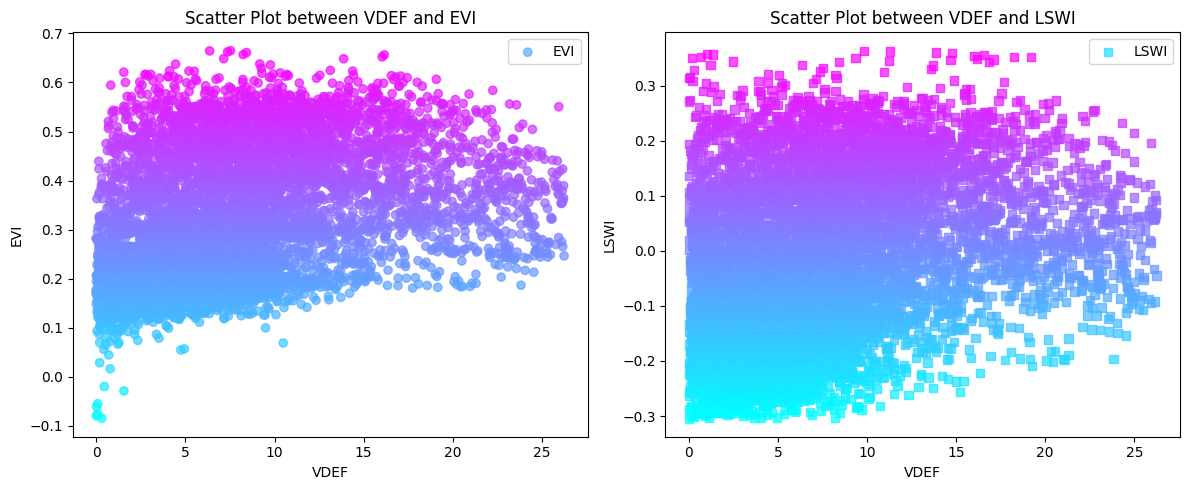

In [ ]:
# Set a custom color palette from seaborn
sns.set_palette("cool")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot 1: VDEF vs EVI
axes[0].scatter(
    p13_final_df_ind_imp['VDEF'],
    p13_final_df_ind_imp['EVI'],
    c=p13_final_df_ind_imp['EVI'],  # Color the markers by EVI values
    cmap='cool',  # Use the 'cool' colormap
    marker='o',  # Marker style (circle)
    alpha=0.7,  # Transparency
    label='EVI'  # Legend label
)
axes[0].set_xlabel("VDEF")
axes[0].set_ylabel("EVI")
axes[0].set_title("Scatter Plot between VDEF and EVI")
axes[0].legend()  # Show legend

# Scatter plot 2: VDEF vs LSWI
axes[1].scatter(
    p13_final_df_ind_imp['VDEF'],
    p13_final_df_ind_imp['LSWI'],
    c=p13_final_df_ind_imp['LSWI'],  # Color the markers by LSWI values
    cmap='cool',  # Use the 'cool' colormap
    marker='s',  # Marker style (square)
    alpha=0.7,  # Transparency
    label='LSWI'  # Legend label
)
axes[1].set_xlabel("VDEF")
axes[1].set_ylabel("LSWI")
axes[1].set_title("Scatter Plot between VDEF and LSWI")
axes[1].legend()  # Show legend

# Adjust spacing between subplots
plt.tight_layout()



# Show the plots
plt.show()




In [ ]:
p13_final_df_ind_imputed.columns

Index(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD', 'ATOT',
       'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60', 'EVI', 'LSWI',
       'RAIN_7_Days', 'RAIN_14_Days', 'RAIN_21_Days', 'RAIN_28_Days'],
      dtype='object')

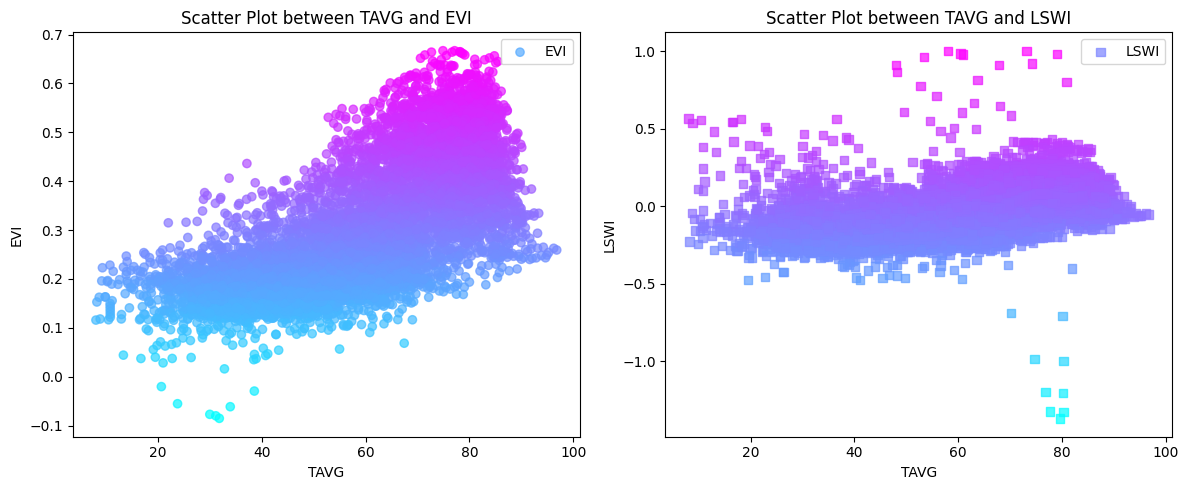

In [ ]:
# Set a custom color palette from seaborn
sns.set_palette("cool")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot 1: TAVG vs EVI
axes[0].scatter(
    p13_final_df_ind_imputed['TAVG'],
    p13_final_df_ind_imputed['EVI'],
    c=p13_final_df_ind_imputed['EVI'],  # Color the markers by EVI values
    cmap='cool',  # Use the 'cool' colormap
    marker='o',  # Marker style (circle)
    alpha=0.7,  # Transparency
    label='EVI'  # Legend label
)
axes[0].set_xlabel("TAVG")
axes[0].set_ylabel("EVI")
axes[0].set_title("Scatter Plot between TAVG and EVI")
axes[0].legend()  # Show legend

# Scatter plot 2: TAVG vs LSWI
axes[1].scatter(
    p13_final_df_ind_imputed['TAVG'],
    p13_final_df_ind_imputed['LSWI'],
    c=p13_final_df_ind_imputed['LSWI'],  # Color the markers by LSWI values
    cmap='cool',  # Use the 'cool' colormap
    marker='s',  # Marker style (square)
    alpha=0.7,  # Transparency
    label='LSWI'  # Legend label
)
axes[1].set_xlabel("TAVG")
axes[1].set_ylabel("LSWI")
axes[1].set_title("Scatter Plot between TAVG and LSWI")
axes[1].legend()  # Show legend

# Adjust spacing between subplots
plt.tight_layout()



# Show the plots
plt.show()

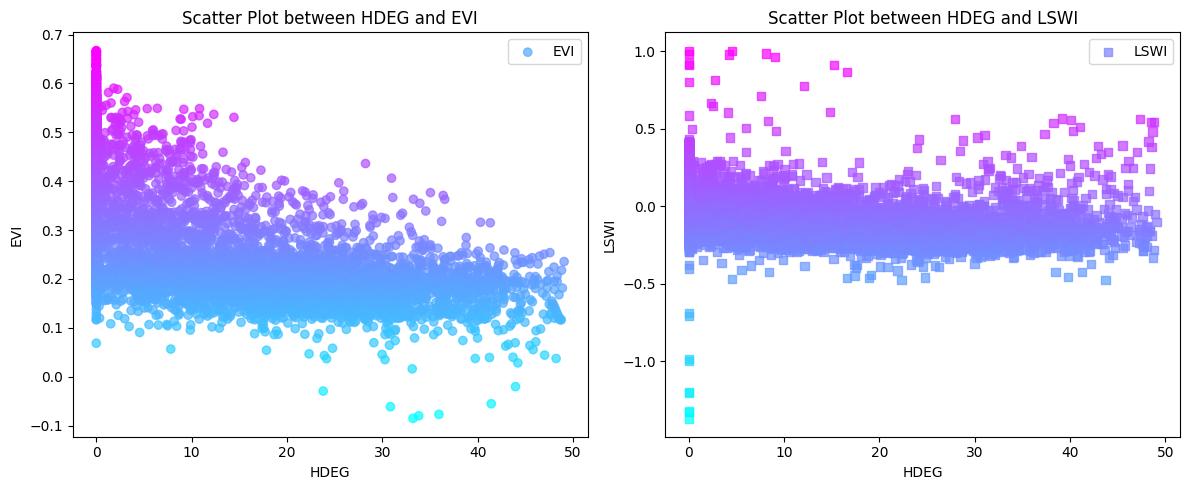

In [ ]:
# Set a custom color palette from seaborn
sns.set_palette("cool")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot 1: HDEG vs EVI
axes[0].scatter(
    p13_final_df_ind_imputed['HDEG'],
    p13_final_df_ind_imputed['EVI'],
    c=p13_final_df_ind_imputed['EVI'],  # Color the markers by EVI values
    cmap='cool',  # Use the 'cool' colormap
    marker='o',  # Marker style (circle)
    alpha=0.7,  # Transparency
    label='EVI'  # Legend label
)
axes[0].set_xlabel("HDEG")
axes[0].set_ylabel("EVI")
axes[0].set_title("Scatter Plot between HDEG and EVI")
axes[0].legend()  # Show legend

# Scatter plot 2: HDEG vs LSWI
axes[1].scatter(
    p13_final_df_ind_imputed['HDEG'],
    p13_final_df_ind_imputed['LSWI'],
    c=p13_final_df_ind_imputed['LSWI'],  # Color the markers by LSWI values
    cmap='cool',  # Use the 'cool' colormap
    marker='s',  # Marker style (square)
    alpha=0.7,  # Transparency
    label='LSWI'  # Legend label
)
axes[1].set_xlabel("HDEG")
axes[1].set_ylabel("LSWI")
axes[1].set_title("Scatter Plot between HDEG and LSWI")
axes[1].legend()  # Show legend

# Adjust spacing between subplots
plt.tight_layout()



# Show the plots
plt.show()

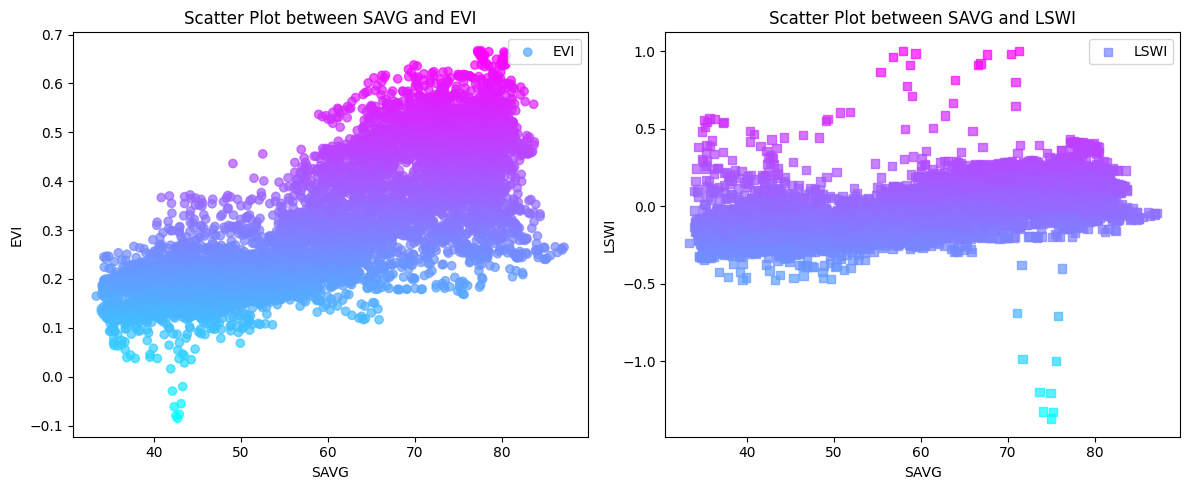

In [ ]:
# Set a custom color palette from seaborn
sns.set_palette("cool")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot 1: SAVG vs EVI
axes[0].scatter(
    p13_final_df_ind_imputed['SAVG'],
    p13_final_df_ind_imputed['EVI'],
    c=p13_final_df_ind_imputed['EVI'],  # Color the markers by EVI values
    cmap='cool',  # Use the 'cool' colormap
    marker='o',  # Marker style (circle)
    alpha=0.7,  # Transparency
    label='EVI'  # Legend label
)
axes[0].set_xlabel("SAVG")
axes[0].set_ylabel("EVI")
axes[0].set_title("Scatter Plot between SAVG and EVI")
axes[0].legend()  # Show legend

# Scatter plot 2: SAVG vs LSWI
axes[1].scatter(
    p13_final_df_ind_imputed['SAVG'],
    p13_final_df_ind_imputed['LSWI'],
    c=p13_final_df_ind_imputed['LSWI'],  # Color the markers by LSWI values
    cmap='cool',  # Use the 'cool' colormap
    marker='s',  # Marker style (square)
    alpha=0.7,  # Transparency
    label='LSWI'  # Legend label
)
axes[1].set_xlabel("SAVG")
axes[1].set_ylabel("LSWI")
axes[1].set_title("Scatter Plot between SAVG and LSWI")
axes[1].legend()  # Show legend

# Adjust spacing between subplots
plt.tight_layout()



# Show the plots
plt.show()

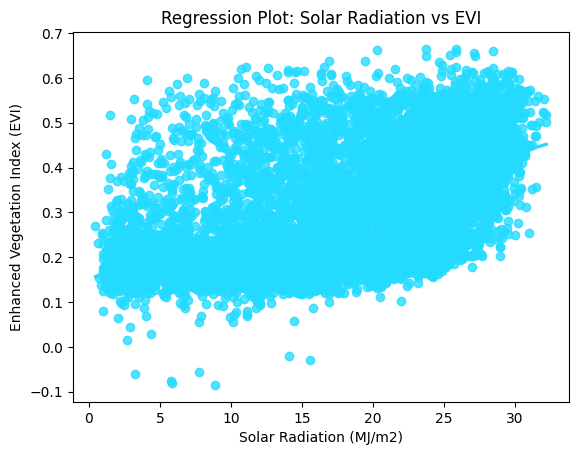

In [ ]:
sns.regplot(x='ATOT', y='EVI', data=p13_final_df_ind_imp)
plt.title('Regression Plot: Solar Radiation vs EVI')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Enhanced Vegetation Index (EVI)')
plt.show()

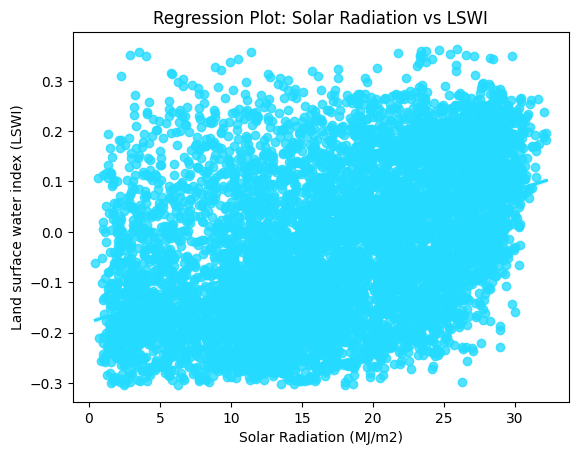

In [ ]:
sns.regplot(x='ATOT', y='LSWI', data=p13_final_df_ind_imp)
plt.title('Regression Plot: Solar Radiation vs LSWI')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Land surface water index (LSWI)')
plt.show()

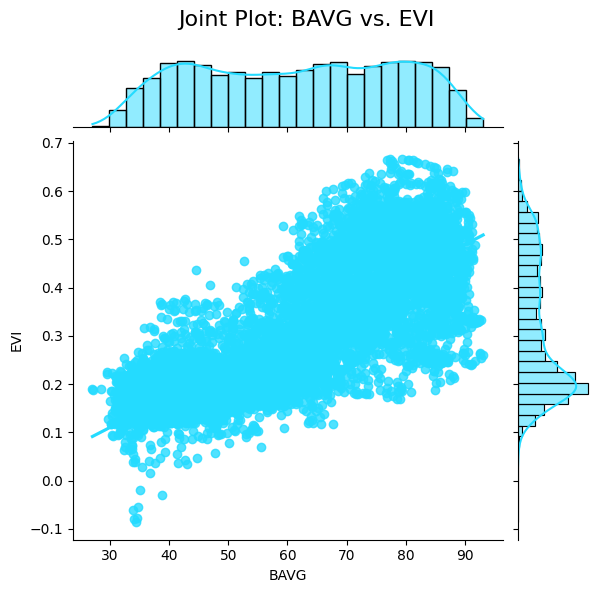

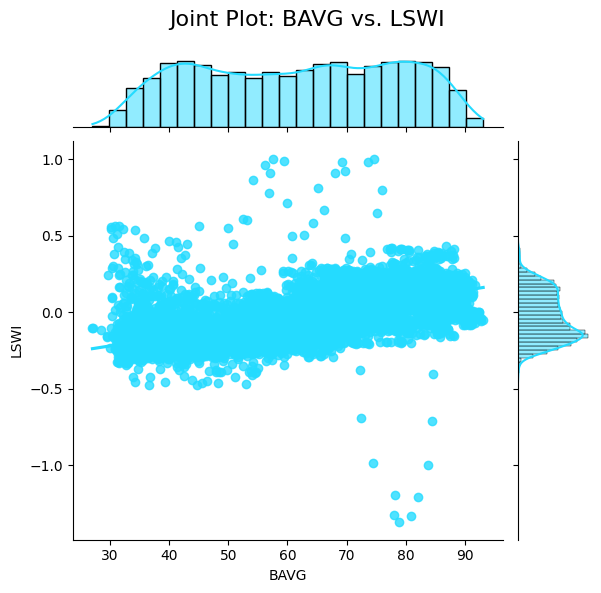

In [ ]:
#Jointplot between BAVG vs EVI and BAVG vs LSWI
variables_of_interest = ['BAVG', 'EVI', 'LSWI']

# Create joint plots side by side for EVI and LSWI
for var in variables_of_interest[1:]:
    g = sns.jointplot(x='BAVG', y=var, data=p13_final_df_ind_imputed, kind='reg', height=6)
    g.set_axis_labels('BAVG', var)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Joint Plot: BAVG vs. {var}', fontsize=16)



In [ ]:
import statsmodels.api as sm

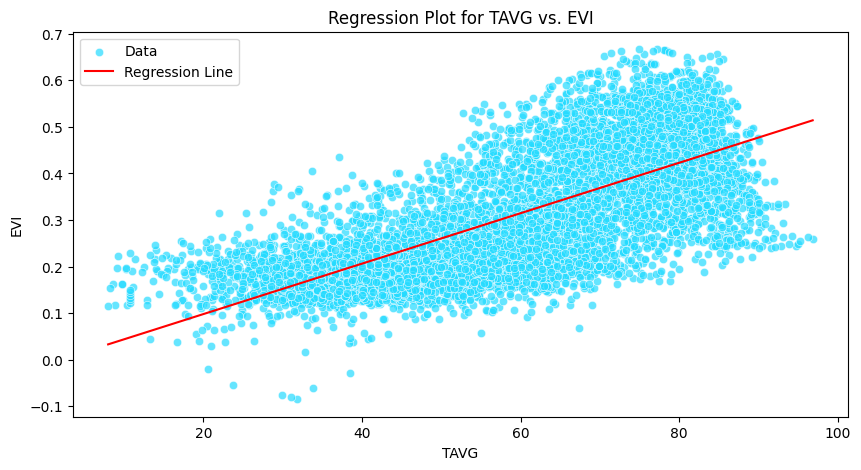

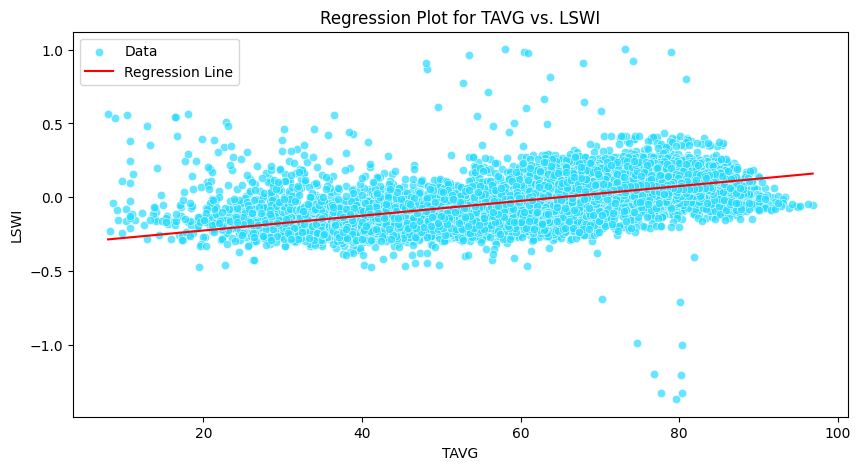

In [ ]:
# Perform separate regressions for EVI and LSWI
for dep_var in ['EVI', 'LSWI']:
    # Extract the dependent variable
    y = p13_final_df_ind_imputed[dep_var]

    # Add a constant (intercept) term to TAVG
    X = sm.add_constant(p13_final_df_ind_imputed['TAVG'])

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Get the regression coefficients
    coef = model.params
    intercept, slope = coef['const'], coef['TAVG']

    # Create a scatter plot with regression line
    plt.figure(figsize=(10, 5))

    # Scatter plot
    sns.scatterplot(data=p13_final_df_ind_imputed, x='TAVG', y=dep_var, alpha=0.7, label='Data')

    # Regression line
    sns.lineplot(x=p13_final_df_ind_imputed['TAVG'], y=intercept + slope * p13_final_df_ind_imputed['TAVG'], color='red', label='Regression Line')

    plt.xlabel('TAVG')
    plt.ylabel(dep_var)
    plt.title(f'Regression Plot for TAVG vs. {dep_var}')
    plt.legend()

    plt.show()

**Multivariate Regression Analysis**

                            OLS Regression Results                            
Dep. Variable:                    EVI   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1418.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:50:27   Log-Likelihood:                 9440.7
No. Observations:                7797   AIC:                        -1.885e+04
Df Residuals:                    7783   BIC:                        -1.876e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2136      0.064      3.357   

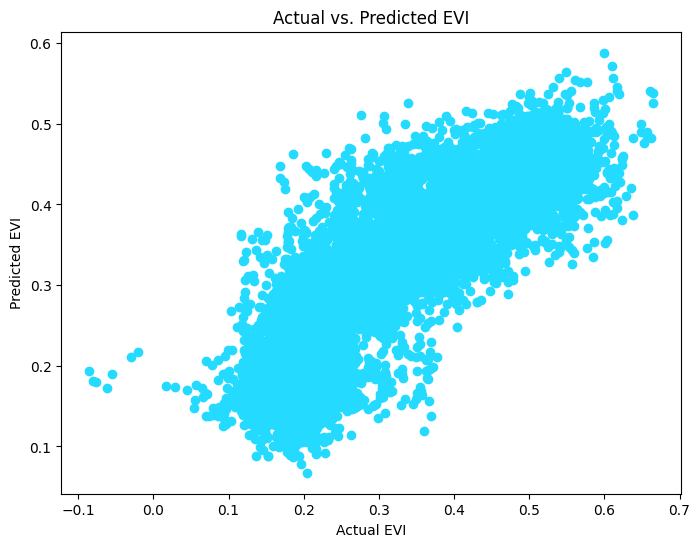

                            OLS Regression Results                            
Dep. Variable:                   LSWI   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     725.3
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:50:28   Log-Likelihood:                 6797.8
No. Observations:                7797   AIC:                        -1.357e+04
Df Residuals:                    7783   BIC:                        -1.347e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0042      0.089     -0.047   

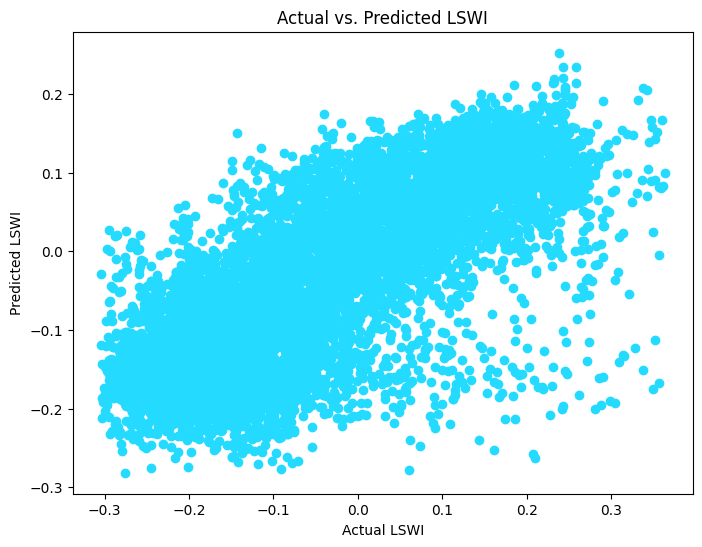

In [ ]:

independent_vars = [
    'TMAX', 'TMIN', 'TAVG', 'VDEF', 'HDEG', 'CDEG', 'ATOT', 'SAVG', 'BAVG', 'RAIN_7_Days', 'RAIN_14_Days','RAIN_21_Days', 'RAIN_28_Days'
]
# Dependent variables
dependent_vars = ['EVI', 'LSWI']

for dep_var in dependent_vars:
    # Extract the dependent variable
    y = p13_final_df_ind_imp[dep_var]

    # Add a constant (intercept) term to the independent variables
    X = sm.add_constant(p13_final_df_ind_imp[independent_vars])

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression
    print(model.summary())

    # Visualize the regression results (scatter plot of actual vs. predicted values)
    predicted_values = model.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(y, predicted_values)
    plt.xlabel(f'Actual {dep_var}')
    plt.ylabel(f'Predicted {dep_var}')
    plt.title(f'Actual vs. Predicted {dep_var}')
    plt.show()

In [ ]:
df_filtered

TMAX   TMIN   TAVG   HAVG   VDEF   HDEG  CDEG   WSPD   ATOT  \
Date                                                                       
2000-03-16  51.91  30.63  35.60  99.84   0.01  23.73   0.0  12.53   1.95   
2000-03-17  44.02  31.91  38.90  99.32   0.06  27.03   0.0   4.99   3.44   
2000-03-18  47.59  39.43  42.18  91.32   0.85  21.49   0.0   8.90   5.66   
2000-03-19  60.55  37.21  46.12  67.95   4.29  16.12   0.0  11.10  23.28   
2000-03-20  73.85  37.63  55.00  57.60   8.43   9.26   0.0  15.37  23.64   
...           ...    ...    ...    ...    ...    ...   ...    ...    ...   
2021-12-23  62.96  35.38  48.06  75.90   3.46  15.83   0.0  11.00   9.35   
2021-12-24  78.84  50.56  65.62  38.61  14.70   0.30   0.0  18.00   7.44   
2021-12-25  71.31  45.97  58.67  48.67   9.56   6.36   0.0   7.34   9.60   
2021-12-26  76.24  38.72  59.83  61.17   8.73   7.52   0.0  12.92   6.94   
2021-12-27  58.95  38.09  50.24  34.21   8.45  16.48   0.0   9.20   8.15   

            RAIN  ...   BAVG    TR05    TR25    TR60     EVI    LSWI  \
Date              ...                                                  
2000-03-16  0.23  ...  49.05  1.5728  1.5437  1.4708  0.1671 -0.2239   
2000-03-17  0.40  ...  43.58  1.5291  1.5439  1.4723  0.1700 -0.2250   
2000-03-18  0.02  ...  46.06  1.5287  1.5465  1.4685  0.1741 -0.2236   
2000-03-19  0.00  ...  48.53  1.5285  1.5431  1.4681  0.1782 -0.2200   
2000-03-20  0.00  ...  50.28  1.5416  1.5443  1.4706  0.1825 -0.2141   
...          ...  ...    ...     ...     ...     ...     ...     ...   
2021-12-23  0.01  ...  47.67  2.3404  1.9822  2.5208  0.2145 -0.0925   
2021-12-24  0.00  ...  51.71  2.3299  1.9822  2.5161  0.2287 -0.0706   
2021-12-25  0.00  ...  55.04  2.3254  1.9832  2.5116  0.2484 -0.0417   
2021-12-26  0.00  ...  53.17  2.3360  1.9868  2.5046  0.2735 -0.0059   
2021-12-27  0.00  ...  52.70  2.3459  1.9922  2.4992  0.3040  0.0370   

            RAIN_7_Days  RAIN_14_Days  RAIN_21_Days  RAIN_28_Days  
Date                                                               
2000-03-16         0.54          1.31          2.60          3.08  
2000-03-17         0.93          1.64          2.42          3.48  
2000-03-18         0.95          1.66          2.44          3.50  
2000-03-19         0.95          1.66          2.44          3.50  
2000-03-20         0.95          1.66          2.44          3.50  
...                 ...           ...           ...           ...  
2021-12-23         0.01          0.02          0.02          0.02  
2021-12-24         0.01          0.01          0.02          0.02  
2021-12-25         0.01          0.01          0.02          0.02  
2021-12-26         0.01          0.01          0.02          0.02  
2021-12-27         0.01          0.01          0.02          0.02  

[7795 rows x 21 columns]

In [ ]:
#df.reset_index(inplace=True)

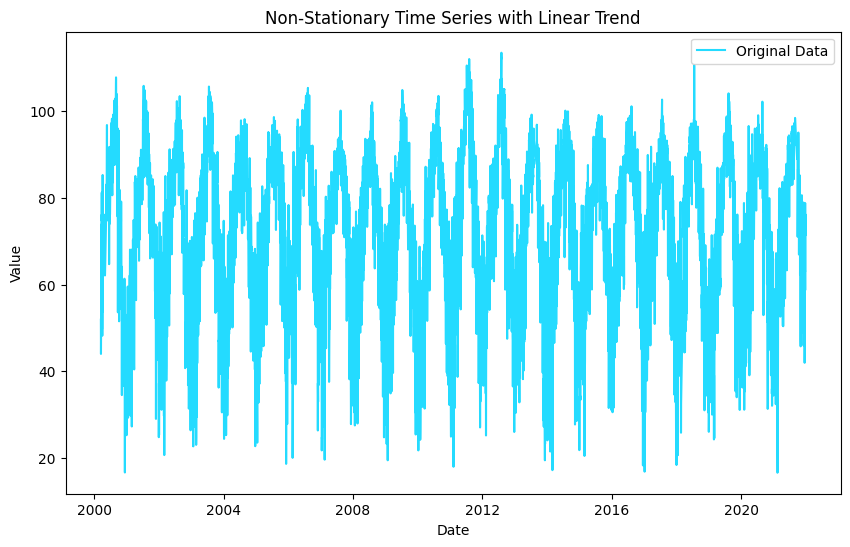

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered["TMAX"], label="Original Data")
plt.title("Non-Stationary Time Series with Linear Trend")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
df_filtered.columns

Index(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD', 'ATOT',
       'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60', 'EVI', 'LSWI',
       'RAIN_7_Days', 'RAIN_14_Days', 'RAIN_21_Days', 'RAIN_28_Days'],
      dtype='object')

In [ ]:
file_name = 'df_filtered.pkl'
file_path = os.path.join(pickle_dir, file_name)
# save/dump to pickle
with open(file_path, 'wb') as handle:
    pickle.dump(df_filtered, handle, protocol=pickle.HIGHEST_PROTOCOL)